In [11]:
import numpy as np
import pandas as pd
import random as rand
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import ndjson
import ipyvolume as ipv
from matplotlib import colors
import matplotlib
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap as umap
import seaborn as sns
import random
import json

In [12]:
DRAWING_POSITION = 0
PATH = './data/5_categories/'
VALIDATION_PATH = './data/to_be_validated/' 
PERCENT = 0.1

# Importing the files

In [13]:
data = []
filelist = os.listdir(PATH)
print(filelist)

['full-raw-ant.ndjson', 'full-raw-angel.ndjson', 'full-raw-aircraft carrier.ndjson', 'full-raw-airplane.ndjson', 'full-raw-ambulance.ndjson']


In [14]:
for file in filelist:
    if(file.split('.')[1] == "ndjson"):
        with open(PATH + file) as f:
            data = data + ndjson.load(f)
            print(len(data))
        f.close()

4094
8092
12111
16106
20058


In [15]:
rand.shuffle(data)

# Printing some drawings

In [16]:
# Just for demostration purposes, let's see some images.
nrows, ncols = 2, 4
plt.figure(figsize=(15,5));
plt.gray()

for j in range(ncols * nrows):
    drawing = data[DRAWING_POSITION + j]["drawing"]
    category = data[DRAWING_POSITION + j]["word"]
    recognized = data[DRAWING_POSITION + j]["recognized"]
    
    ax = plt.subplot(nrows, ncols, j + 1)
    
    for i in range(len(drawing)):
        stroke = drawing[i]
        ax.plot(stroke[0], stroke[1], color='k')
    
    plt.subplots_adjust(hspace = .7, wspace = .7)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title("Category: " + category + "\nRecognized: " + str(recognized))
    #plt.gca().invert_xaxis()
plt.savefig('./report_images/1-Printing_some_images.png', format='png', dpi=100)
plt.close()

# Preprocessing the data

In [28]:
key_ids = np.array([])
categories = np.array([])
numeric_categories = np.array([])
recognized = np.array([])
timestamps = np.array([])
countrycodes = np.array([])
drawings = [[] for _ in range(17698)]
outputFile = open("./data/allPreprocessed.json", mode='a')

boolList = ["True"]
drawing_position=0

for i in range(len(data)):
    print(i)
    if(data[i]["recognized"]):
        key_ids = np.append(key_ids, data[i]["key_id"])
        categories = np.append(categories, data[i]["word"])
    
        if (data[i]["word"] == 'ambulance'): numeric_value = int(0)
        elif (data[i]["word"] == 'angel'): numeric_value = int(1)
        elif (data[i]["word"] == 'aircraft carrier'): numeric_value = int(2)
        elif (data[i]["word"] == 'airplane'): numeric_value = int(3)
        elif (data[i]["word"] == 'ant'): numeric_value = int(4)

    
        numeric_categories = np.append(numeric_categories, numeric_value)
        
        recognized = np.append(recognized, data[i]["recognized"])
        timestamps = np.append(timestamps, data[i]["timestamp"])
        countrycodes = np.append(countrycodes, data[i]["countrycode"])

        #Convert drawing vector's into matrix
        drawing = data[i]["drawing"]
        key_id = data[i]["key_id"]

        for j in range(len(drawing)):
            stroke = drawing[j]
            plt.plot(stroke[0], stroke[1], color='k')

        plt.gca().invert_yaxis()
        plt.axis('off')
        plt.savefig('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.png', format='png', dpi=25)
        plt.close()
        img = Image.open('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.png').convert('L')
        img.save('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.bmp')
        os.remove('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.png')

        bitmap = np.array(img)
        img_array = np.array([])


        for j in range(len(bitmap)):
            for k in range(len(bitmap[j])):
                img_array = np.append(img_array, bitmap[j][k])

        if (len(img_array)):
            drawings[drawing_position] = img_array
            drawing_position = drawing_position + 1

numeric_categories = numeric_categories.astype(int)

4
16725
16726
16727
16728
16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
16739
16740
16741
16742
16743
16744
16745
16746
16747
16748
16749
16750
16751
16752
16753
16754
16755
16756
16757
16758
16759
16760
16761
16762
16763
16764
16765
16766
16767
16768
16769
16770
16771
16772
16773
16774
16775
16776
16777
16778
16779
16780
16781
16782
16783
16784
16785
16786
16787
16788
16789
16790
16791
16792
16793
16794
16795
16796
16797
16798
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16

In [29]:
print(drawings)

]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.]), array([255., 255., 255., ..., 255., 255., 255.

# Profiling

## Countrycodes Apearences

139


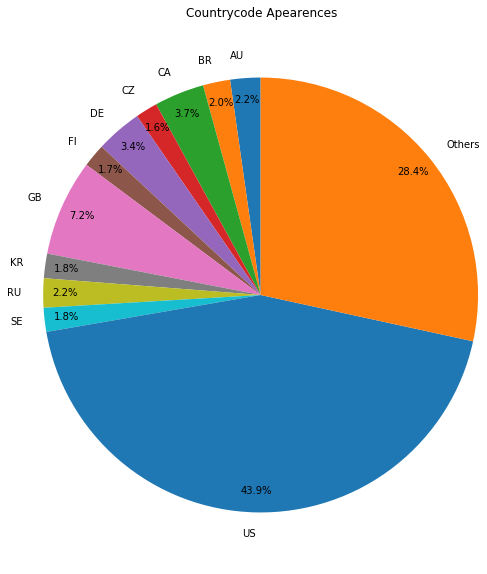

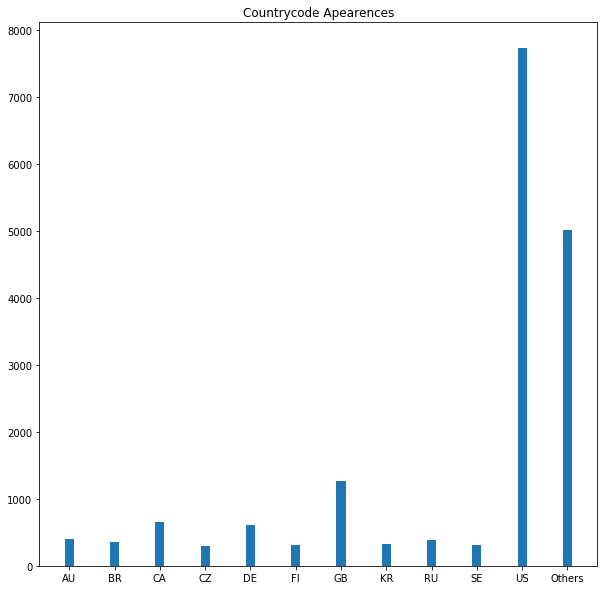

In [18]:
# countrycodes_values = list(set(countrycodes))
# countrycodes_values.sort()
# countrycodes_apearences = []

# for i in range (len(countrycodes_values)):
#     list_countrycodes = list(countrycodes)
#     count = list_countrycodes.count(countrycodes_values[i])
#     countrycodes_apearences.append(count)

# plt.subplots(figsize=(30,15))
# plt.bar(countrycodes_values, countrycodes_apearences , width=0.2)
# plt.title('Countrycode Apearences')
# plt.autoscale(axis= 'x', tight=True)
# plt.savefig('./report_images/0-Countrycodes_Apearences.png', bbox_inches='tight')
# plt.show()

countrycodes_values = list(set(countrycodes))
countrycodes_values.sort()
print(len(countrycodes_values))
countrycodes_labels = []
countrycodes_apearences = []
list_countrycodes = list(countrycodes)
percentages = []
total = len(countrycodes)
others_percentage = 0
count1=0
count2=0
for i in countrycodes_values:
    count = list_countrycodes.count(i)
    percentage = (count/total)*100
    if (percentage >= 1.5):
        
        countrycodes_apearences.append(count)
        percentages.append(percentage)
        countrycodes_labels.append(i)
    else:
        count1 = count1 + 1
        count2 = count2 + count
        others_percentage = others_percentage + percentage

countrycodes_labels.append('Others')
countrycodes_apearences.append(count2)
percentages.append(others_percentage)

    

plt.subplots(figsize=(10,10))
plt.pie(percentages, None, countrycodes_labels, autopct='%1.1f%%', shadow=False, startangle=90, pctdistance=0.9)
plt.title('Countrycode Apearences')
plt.autoscale(axis= 'x', tight=True)
plt.savefig('./report_images/0-Countrycodes_Apearences_Pie.png', bbox_inches='tight')
plt.show()
plt.close()

plt.subplots(figsize=(10,10))
plt.bar(countrycodes_labels, countrycodes_apearences , width=0.2)
plt.title('Countrycode Apearences')
plt.autoscale(axis= 'x', tight=False)
plt.savefig('./report_images/0-Countrycodes_Apearences_Bar.png')
plt.show()
plt.close()


## Category Apearences

{'angel', 'airplane', 'aircraft carrier', 'ant', 'ambulance'}


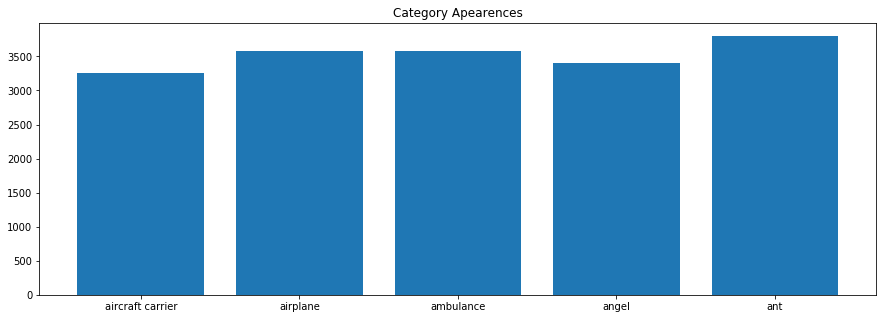

In [19]:
categories_values = list(set(categories))
print(set(categories))
categories_values.sort()
categories_apearences = []
mean = len(categories)/len(categories_values)

for i in range (len(categories_values)):
    list_categories = list(categories)
    count = list_categories.count(categories_values[i])
    categories_apearences.append(count)

fig, ax = plt.subplots(figsize=(15,5))
plt.bar(categories_values, categories_apearences)
plt.title('Category Apearences')
plt.autoscale(axis= 'x')
plt.savefig('./report_images/0-Category_Apearences.png')
plt.show()


## Recognition Rate

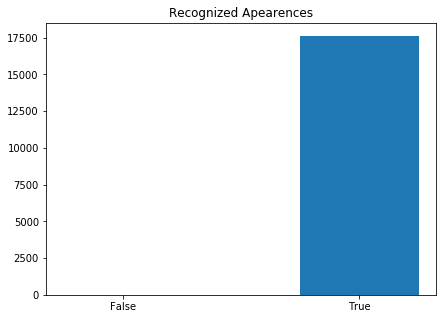

In [20]:
recognize_values = [False, True]
recognize_apearences = []

for i in range (len(recognize_values)):
    list_recognized = list(recognized)
    count = list_recognized.count(recognize_values[i])
    recognize_apearences.append(count)

plt.subplots(figsize=(7,5))
plt.bar(["False", "True"], recognize_apearences , width=0.5)
plt.title('Recognized Apearences')
plt.savefig('./report_images/0-Recognized_Apearences.png', bbox_inches='tight')
plt.show()


# Visualization by dimensionality reduction

## PCA 2D

In [30]:
# Select only the first 2 principal components
pca = PCA(2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(drawings)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1], c=numeric_categories, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.title("Top 2 Principal Components")
plt.savefig('./report_images/2-PCA2_outliers.png', bbox_inches='tight')

ValueError: setting an array element with a sequence.

## PCA 3D

<Figure size 1080x720 with 0 Axes>

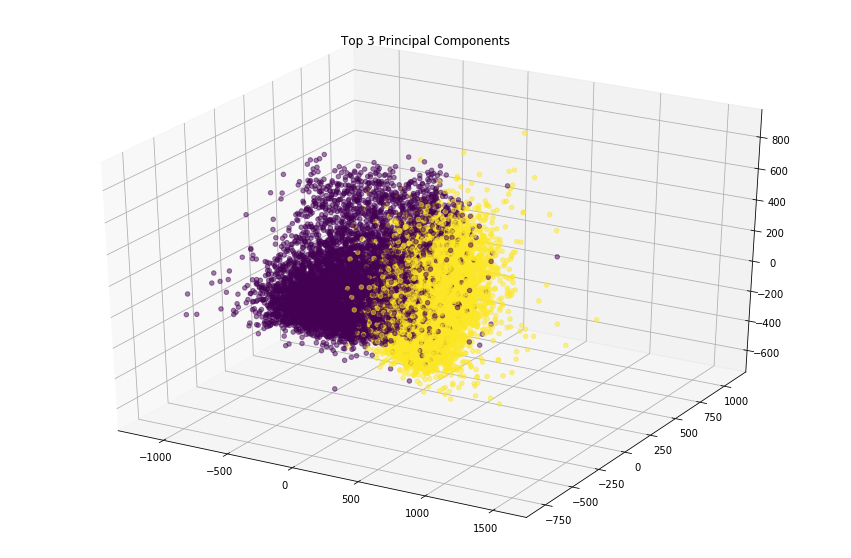

In [57]:
pca = PCA(3)  # project from 64 to 3 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(drawings)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2], c=numeric_categories,  alpha=0.5,cmap='viridis')
plt.title("Top 3 Principal Components")
plt.savefig('./report_images/2-PCA3_outliers.png', bbox_inches='tight')
#plt.savefig('fig1.png', bbox_inches='tight')

# Preparing to classify

## Splitting data into training and testing

In [58]:
from sklearn.model_selection import train_test_split

# Training and testing split,
# 75% for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(drawings), categories, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

# Checking sizes of each data split
print("Training data points: {}".format(len(trainLabels)))
# print("Validation data points: {}".format(len(valLabels)))
print("Testing data points: {}".format(len(testLabels)))

Training data points: 13273
Testing data points: 4425


## Importing data for validation

In [68]:
validationData = []
filelist = os.listdir(VALIDATION_PATH)
for file in filelist:
    if(file.split('.')[1] == "ndjson"):
        with open(VALIDATION_PATH + file) as f:
            validationData = validationData + ndjson.load(f)

rand.shuffle(validationData)

In [69]:
# validation_key_ids = np.array([])
validation_categories = np.array([])
validation_numeric_categories = np.array([])
validation_drawings = [[] for _ in range(len(validationData))]

for i in range(len(validationData)):
    
#     validation_key_ids = np.append(validation_key_ids, validationData[i]["key_id"])
    validation_categories = np.append(validation_categories, validationData[i]["word"])
    
    if (validationData[i]["word"] == 'ambulance'): validation_numeric_categories = np.append(validation_numeric_categories, int(0))
    elif (validationData[i]["word"] == 'angel'): validation_numeric_categories = np.append(validation_numeric_categories, int(1))
    elif (validationData[i]["word"] == 'aircraft carrier'): validation_numeric_categories = np.append(validation_numeric_categories, int(2))
    elif (validationData[i]["word"] == 'airplane'): validation_numeric_categories = np.append(validation_numeric_categories, int(3))
    elif (validationData[i]["word"] == 'ant'): validation_numeric_categories = np.append(validation_numeric_categories, int(4))
        
    validation_drawing = validationData[i]["drawing"]
    validation_key_id = validationData[i]["key_id"]
    
    for j in range(len(validation_drawing)):
        stroke = validation_drawing[j]
        plt.plot(stroke[0], stroke[1], color='k')

    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.savefig('./plots/' + str(validation_key_id) + '.png', format='png', dpi=25)
    plt.close()
    img = Image.open('./plots/' + str(validation_key_id) + '.png').convert('L')
    img.save('./plots/' + str(validation_key_id) + '.bmp')
    os.remove('./plots/' + str(validation_key_id) + '.png')
    
    bitmap = np.array(img)
    img_array = np.array([])


    for j in range(len(bitmap)):
        for k in range(len(bitmap[j])):
            img_array = np.append(img_array, bitmap[j][k])

    validation_drawings[i] = img_array

    
validation_numeric_categories = validation_numeric_categories.astype(int)

# KNN Clustering

## Finding the better "k"

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in range(1, 30, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(testData, testLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("\nk=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))


k=1, accuracy=55.16%
k=3, accuracy=51.89%
k=5, accuracy=52.02%
k=7, accuracy=53.18%
k=9, accuracy=81.88%
k=11, accuracy=81.42%
k=13, accuracy=79.12%
k=15, accuracy=77.79%
k=17, accuracy=75.55%
k=19, accuracy=74.89%
k=21, accuracy=73.94%
k=23, accuracy=72.79%
k=25, accuracy=71.77%
k=27, accuracy=71.23%
k=29, accuracy=70.98%

k=9 achieved highest accuracy of 81.88% on validation data


## Training the classifier

In [71]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(validation_drawings)

## Analyzing the results

In [72]:
#check accuracy of our model on the test data
socre = model.score(validation_drawings, validation_categories)
print(score)


0.7098305084745763
